In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In this project we will check the different charateristics of portable and non portable water, their relationship and to predict the portability of water using different models. 

### Importing Dataset

In [3]:
path = r'E:\Freelancing\March\mtluWaterDataProject'
df = pd.read_csv(path+'\water_potability.csv')

### Data Visualization

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Handle Null values

In [5]:
df.isnull().sum().sort_values(ascending=False)

Sulfate            781
ph                 491
Trihalomethanes    162
Potability           0
Turbidity            0
Organic_carbon       0
Conductivity         0
Chloramines          0
Solids               0
Hardness             0
dtype: int64

### Data Cleaning

In [6]:
# Fill mean values inplace of all Null values. 
df[:] = SimpleImputer(strategy='median').fit_transform(df)

In [7]:
# Check if there is still any Null values. 
df.isnull().sum().sort_values(ascending=False)

Potability         0
Turbidity          0
Trihalomethanes    0
Organic_carbon     0
Conductivity       0
Sulfate            0
Chloramines        0
Solids             0
Hardness           0
ph                 0
dtype: int64

### Visualization and Analysis

Text(0.5, 1.0, 'Histograms of all features of water data')

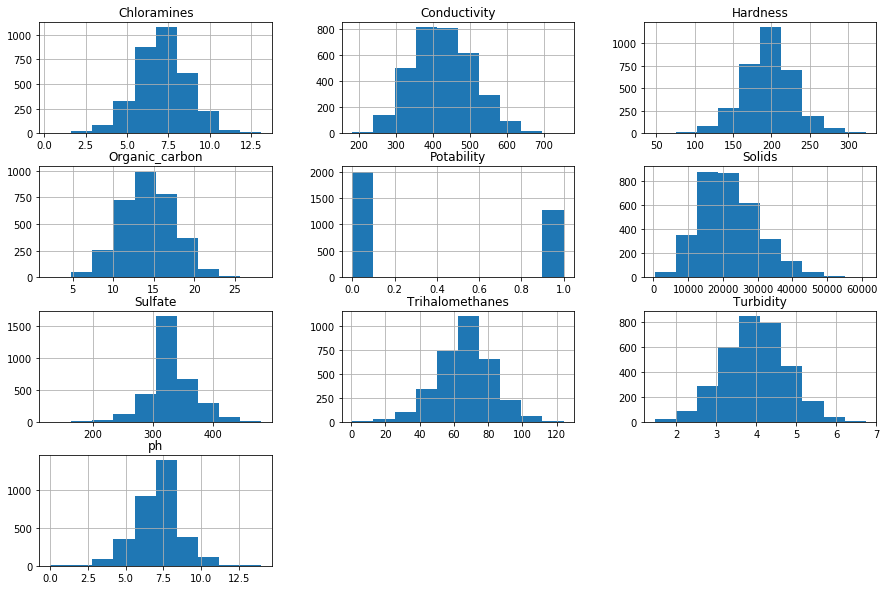

In [8]:
df.hist(figsize=(15, 10))
plt.title("Histograms of all features of water data")

Above figure shows the histograms of each features of water dataset. Except Potability, almost all the features shows normal distribution. Data of these features is making a clustered in one place. 

Text(0.5, 1, 'Heatmap of Feature showing Correlation')

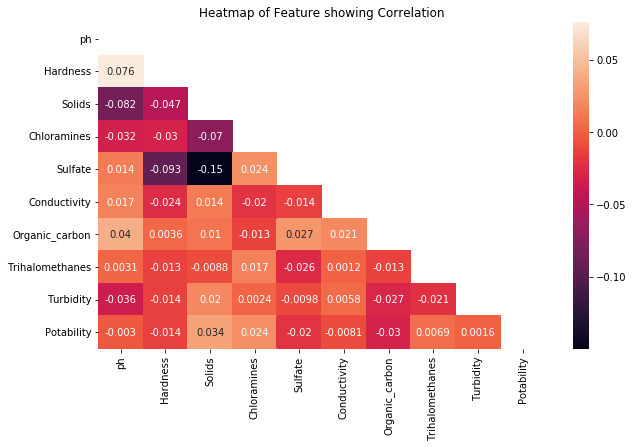

In [9]:
plt.figure(figsize=(10, 6))
strip = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), mask=strip,annot=True)
plt.title('Heatmap of Feature showing Correlation')

Heatmap shows the correlation between all attributes. From the map we can see that there is a no or very weak correlation between the variables becasue the values are very close 0. As there is no obvious relationship betweent the features, so the next step will be to split the data into portable and non portable and then check the relationship between the two. 

In [10]:
dfPortable = df[df['Potability']==1]
dfNonPortable = df[df['Potability']==0]

### Check Correlation of Portable Water

Text(0.5, 1, 'Heatmap of Feature showing Correlation of Portable Water')

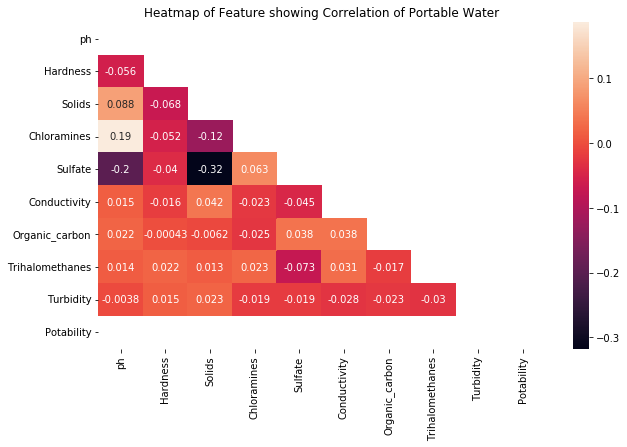

In [11]:
plt.figure(figsize=(10, 6))
strip = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(dfPortable.corr(), mask=strip,annot=True)
plt.title('Heatmap of Feature showing Correlation of Portable Water')

This heatmap also shows the correlation of all the features with other in the water dataset for potability 1. Again after splitting the dataset, there is still no obvious correlation between the features. 

### Correlation of Features of Non Portable Water

Text(0.5, 1, 'Heatmap of Feature showing Correlation of Portable Water')

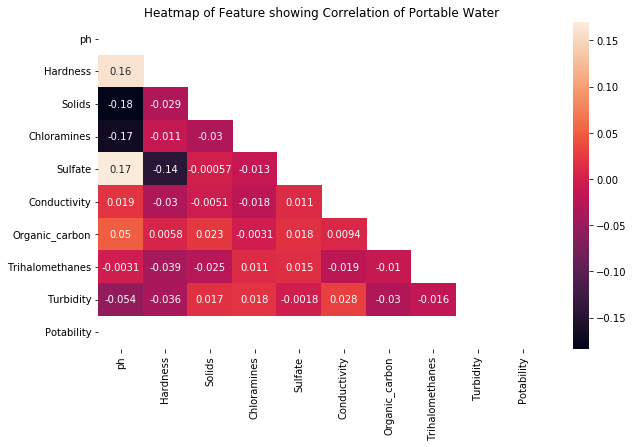

In [12]:
plt.figure(figsize=(10, 6))
strip = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(dfNonPortable.corr(), mask=strip,annot=True)
plt.title('Heatmap of Feature showing Correlation of Portable Water')

This map also shows the correlation between all features of water data where potability is 0. It means that this water is not suitable for drinking. It can cause health problems. Like above heatmaps, this heatmap also doesn't show any obvious correlation between their features. So we will go for some prediciton model to predict the potability of the water.

In [13]:
dfNonPortable.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.0
mean,7.077736,196.733292,21777.490788,7.092175,334.200184,426.730454,14.364335,66.320635,3.965800,0.0
std,1.545590,31.057540,8543.068788,1.501045,31.948293,80.047317,3.334554,15.642787,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.224046,177.823265,15663.057383,6.155640,319.354715,368.498530,12.101057,56.441831,3.444062,0.0
50%,7.036752,197.123423,20809.618280,7.090334,333.073546,422.229331,14.293508,66.622485,3.948076,0.0
75%,7.940697,216.120687,27006.249013,8.066462,348.316746,480.677198,16.649485,76.518849,4.496106,0.0
max,14.000000,304.235912,61227.196010,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [14]:
dfPortable.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.0
mean,7.068655,195.800744,22383.991018,7.169338,332.683125,425.383800,14.160893,66.543247,3.968328,1.0
std,1.344013,35.547041,9101.010208,1.702988,41.865927,82.048446,3.263907,15.971950,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.351824,174.330531,15668.985037,6.094134,313.052947,360.939023,12.033897,56.911186,3.430909,1.0
50%,7.036752,196.632907,21199.386615,7.215163,333.073546,420.712729,14.162809,66.622485,3.958576,1.0
75%,7.780068,218.003420,27973.236447,8.199261,354.807924,484.155911,16.356245,77.067457,4.509569,1.0
max,13.175402,323.124000,56488.672410,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


### Model Prediction

In [15]:
df = df.values
x, y = df[:, :-1], df[:, -1]

In [16]:
x_Train,x_Test,y_Train,y_Test = train_test_split(x,y,test_size=0.20,random_state=0)

scaler = StandardScaler()

X_train = scaler.fit_transform(x_Train)
X_test = scaler.transform(x_Test)

### Naive Bayes Classifier

In [17]:
naive_water_quality = GaussianNB()
naive_water_quality.fit(X_train,y_Train)
naive_prediction = naive_water_quality.predict(X_test)
# To print the accuray. 
print(classification_report(naive_prediction,y_Test))

              precision    recall  f1-score   support

         0.0       0.86      0.65      0.74       544
         1.0       0.22      0.47      0.30       112

    accuracy                           0.62       656
   macro avg       0.54      0.56      0.52       656
weighted avg       0.75      0.62      0.66       656



From the matrix above, we can see that the precision for predicting 0 portability is 0.86 and for 1 is 0.22 which is very low. 0.86 means that for 0, the classifier perfectly classify observation while on the other hand for portability 1, the f1-score values is very low. The calssifier didn't classify obersvation properly. 

### KNN Classifier

In [18]:
KN = KNeighborsClassifier(n_neighbors=30)
KN.fit(X_train,y_Train)
p = KN.predict(X_test)
print(classification_report(p,y_Test))

              precision    recall  f1-score   support

         0.0       0.96      0.66      0.78       599
         1.0       0.16      0.70      0.27        57

    accuracy                           0.66       656
   macro avg       0.56      0.68      0.52       656
weighted avg       0.89      0.66      0.74       656



From the matrix above, we can see that the precision for predicting 0 portability is 0.96 and for 1 is 0.27. It is quite higher
then the previous case (Naive Bayees Classifier). Overall this classifier works better than Naive Bayes classifier. 